<a href="https://colab.research.google.com/github/codesongs/codestates_TP2/blob/main/%5BO%5D_2308_AIB_TP2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Movies

- 영화 제목은 IMDB에서 제공되는 제목과 동일합니다.
- 장르는 다음과 같은 기준으로 표기되어 있습니다.

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- 영화 데이터는 수기로 작성되었기 때문에 정확하지 않은 정보나 오류가 있을 수 있습니다.

##Ratings
- 평점은 1~5점 스케일을 가지고 있으며, 0.5점 단위는 존재하지 않습니다.
- 타임스탬프는 초단위로 측정되어 표기되어 있습니다.
- 각 유저는 최소한 20개 이상의 평점 기록을 가지고 있습니다.


##Users
- Gender : 남성은 "M" 여성은 "F"로 표기
- Age :  다음과 같은 방식으로 표기
	*  1:  "18살 미만"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation : 다음과 같은 방식으로 표기

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

import csv

In [ ]:
#Movies

Movies = pd.read_csv('movies.csv', sep='::', names=['MovieID', 'Title', 'Genres'])

#따옴표 제거
Movies['MovieID'] = Movies['MovieID'].str.replace('"', '')
Movies['Title'] = Movies['Title'].str.replace('"', '')
Movies['Genres'] = Movies['Genres'].str.replace('"', '')

# 'MovieID' 열의 데이터 타입 변환
Movies['MovieID'] = pd.to_numeric(Movies['MovieID'], errors='coerce')
Movies['MovieID'] = Movies['MovieID'].astype(int)
Movies

##할 일
##UserID에서 UserID인지 아님 그냥 순서인지 확인, 그냥 순서라면 1열 지우고 인덱스를 Num 처리하기.
##MovieID에서 ()괄호 부분 분리해서 Release 열 만들고 거기에 넣기
##Genre에서 | 부분에 들어가있는 장르 모두 찾고, Genre-Animation이런식으로 옆으로 열 추가해서 해당하는 것에 1, 0 표시하는 것도 좋을 듯.

<ipython-input-2-21b0196d5212>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Movies = pd.read_csv('movies.csv', sep='::', names=['MovieID', 'Title', 'Genres'])


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
#Ratings

Ratings = pd.read_csv('ratings.csv', sep='::', names=['UserID', 'MovieID', 'Rating', 'TimeStamp'])
Ratings

#

<ipython-input-3-43d859834912>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Ratings = pd.read_csv('ratings.csv', sep='::', names=['UserID', 'MovieID', 'Rating', 'TimeStamp'])


,UserID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
#Users

Users = pd.read_csv('users.csv', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
Users

#Occupation 직업으로 바꾸기

<ipython-input-4-75949aa26e83>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Users = pd.read_csv('users.csv', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


## 데이터 통합

In [ ]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   TimeStamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
df_total = pd.merge(Ratings, Movies, on='MovieID', how='left')
df_total = pd.merge(df_total, Users, on='UserID', how='left')

df_total

,UserID,MovieID,Rating,TimeStamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   TimeStamp   1000209 non-null  int64 
 4   Title       1000209 non-null  object
 5   Genres      1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [ ]:
#One-Hot, 컬럼 앞 "Genre_" 추가

# 'Genres' 컬럼을 원핫인코딩하여 분리
genres = df_total['Genres'].str.get_dummies('|')

# 원핫인코딩된 장르 열 이름에 "Genre_" 추가
genres.columns = ['Genre_' + col for col in genres.columns]

# 원핫인코딩된 장르 열을 기존 데이터프레임에 병합
df_total = pd.concat([df_total, genres], axis=1)

# 'Genres' 컬럼과 원핫인코딩된 장르 열 제거
df_total.drop('Genres', axis=1, inplace=True)

In [ ]:
df_total

,UserID,MovieID,Rating,TimeStamp,Title,Gender,Age,Occupation,Zip-code,Genre_Action,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),F,1,10,48067,0,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),F,1,10,48067,0,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),M,25,6,11106,0,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",M,25,6,11106,0,...,0,0,0,0,0,1,0,0,1,0
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),M,25,6,11106,0,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,4,956715648,Sophie's Choice (1982),M,25,6,11106,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Title 컬럼에서 괄호 안의 숫자 추출하여 Release 컬럼 생성
df_total['Release'] = df_total['Title'].str.extract(r'\((\d{4})\)')

# 결과 확인
df_total

,UserID,MovieID,Rating,TimeStamp,Title,Gender,Age,Occupation,Zip-code,Genre_Action,...,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Release
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,1975
1,1,661,3,978302109,James and the Giant Peach (1996),F,1,10,48067,0,...,0,0,1,0,0,0,0,0,0,1996
2,1,914,3,978301968,My Fair Lady (1964),F,1,10,48067,0,...,0,0,1,0,1,0,0,0,0,1964
3,1,3408,4,978300275,Erin Brockovich (2000),F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,2000
4,1,2355,5,978824291,"Bug's Life, A (1998)",F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),M,25,6,11106,0,...,0,0,0,0,0,0,0,0,0,1989
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",M,25,6,11106,0,...,0,0,0,0,1,0,0,1,0,1992
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),M,25,6,11106,0,...,0,0,0,0,0,0,0,0,0,1995
1000207,6040,1096,4,956715648,Sophie's Choice (1982),M,25,6,11106,0,...,0,0,0,0,0,0,0,0,0,1982


In [ ]:
column_order = ['UserID', 'MovieID', 'Rating', 'TimeStamp', 'Title', 'Release', 'Gender', 'Age',
                'Occupation', 'Zip-code', 'Genre_Action', 'Genre_Adventure',
       'Genre_Animation', "Genre_Children's", 'Genre_Comedy', 'Genre_Crime',
       'Genre_Documentary', 'Genre_Drama', 'Genre_Fantasy', 'Genre_Film-Noir',
       'Genre_Horror', 'Genre_Musical', 'Genre_Mystery', 'Genre_Romance',
       'Genre_Sci-Fi', 'Genre_Thriller', 'Genre_War', 'Genre_Western']

df_total = df_total[column_order]
df_total.head()

,UserID,MovieID,Rating,TimeStamp,Title,Release,Gender,Age,Occupation,Zip-code,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),1975,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),1996,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),1964,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),2000,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",1998,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_total.columns

Index(['UserID', 'MovieID', 'Rating', 'TimeStamp', 'Title', 'Release',
       'Gender', 'Age', 'Occupation', 'Zip-code', 'Genre_Action',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Children's',
       'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama',
       'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_Musical',
       'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller',
       'Genre_War', 'Genre_Western'],
      dtype='object')

## EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_total.head()

,UserID,MovieID,Rating,TimeStamp,Title,Release,Gender,Age,Occupation,Zip-code,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),1975,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),1996,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),1964,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),2000,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",1998,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0


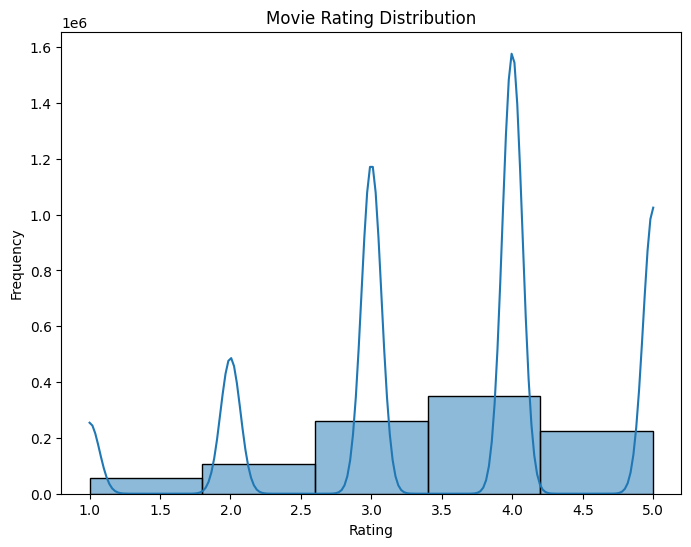

In [ ]:
# 1. 영화 평점 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(data=df_total, x='Rating', bins=5, kde=True)
plt.title('Movie Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

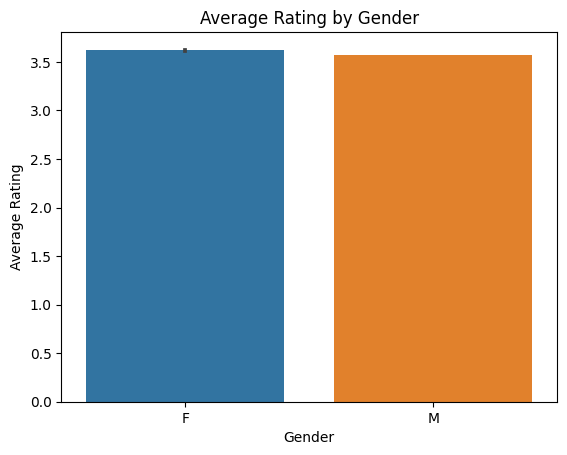

In [ ]:
# 2. 성별에 따른 평점 분석
sns.barplot(data=df_total, x='Gender', y='Rating')
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-24-c706586f9d79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['Age Group'] = pd.cut(df_total['Age'], bins=age_bins, labels=age_labels)


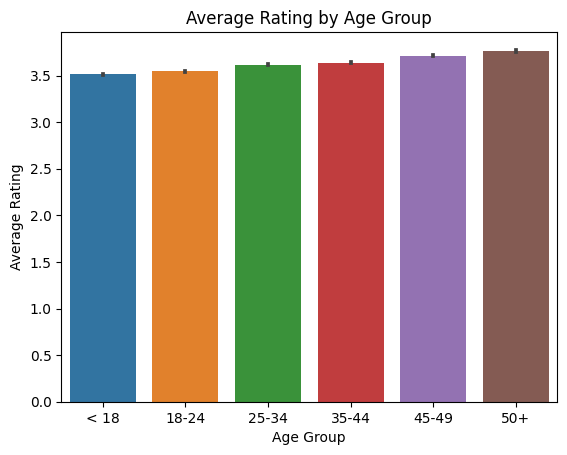

In [ ]:
# 3. 나이대별 영화 관람 및 평점 분석
age_bins = [0, 18, 25, 35, 45, 50, 56]
age_labels = ['< 18', '18-24', '25-34', '35-44', '45-49', '50+']
df_total['Age Group'] = pd.cut(df_total['Age'], bins=age_bins, labels=age_labels)
sns.barplot(data=df_total, x='Age Group', y='Rating')
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()

<ipython-input-25-0e64aa20ff57>:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  genre_counts = df_total[genres].sum()


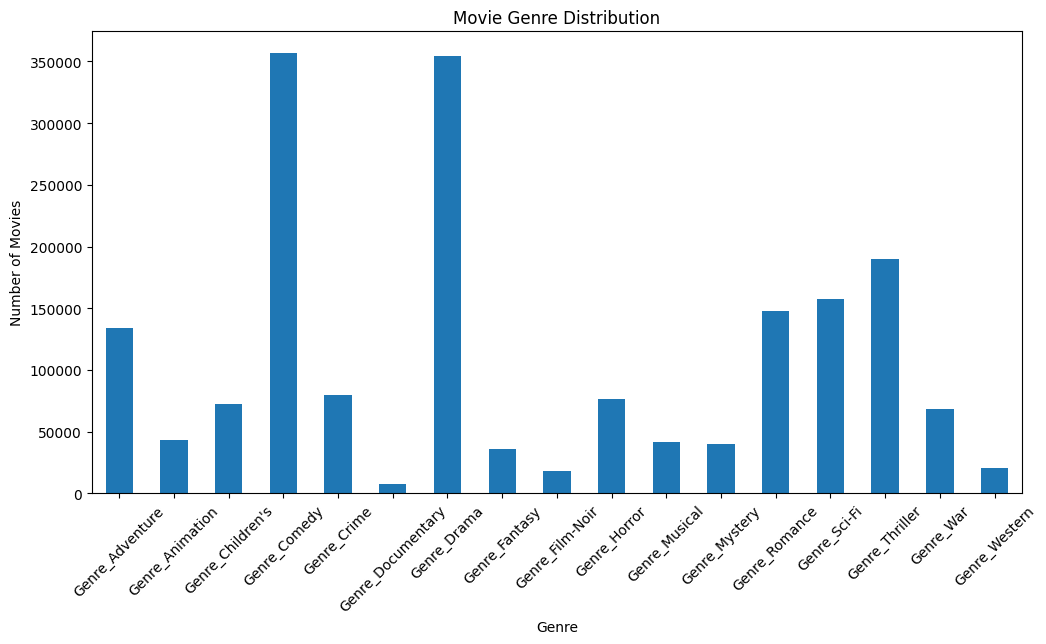

In [ ]:
# 4. 영화 장르별 분포 및 선호도 분석
genres = df_total.columns[11:]  # 장르 컬럼들의 시작 인덱스
genre_counts = df_total[genres].sum()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 직업 코드와 라벨을 매핑한 딕셔너리 생성
occupation_labels = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}


<ipython-input-28-377567ee2fd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['Occupation_Label'] = df_total['Occupation'].map(occupation_labels)


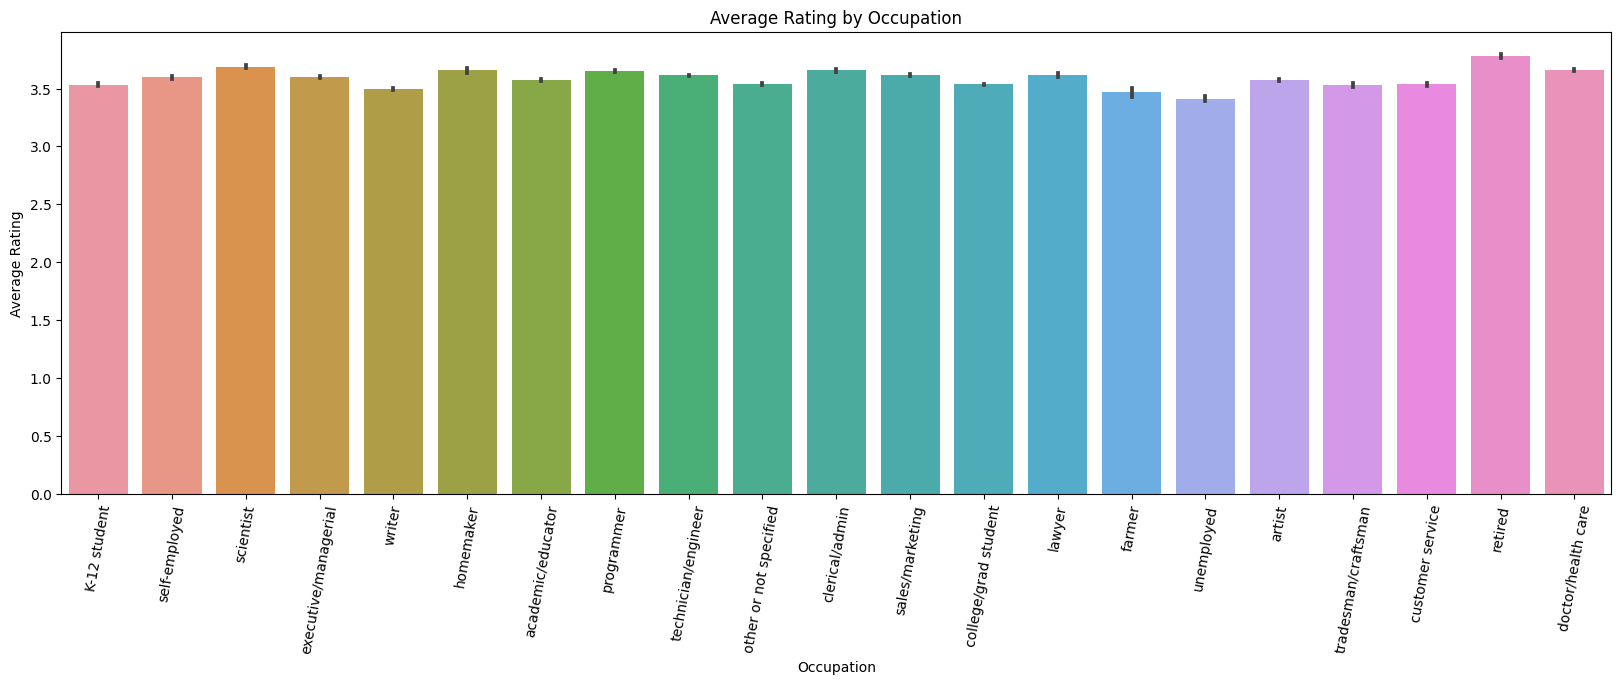

<ipython-input-28-377567ee2fd5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.drop('Occupation_Label', axis=1, inplace=True)


In [ ]:
# 5. 직업에 따른 영화 관람 및 평점 분석

# 직업 코드를 라벨로 매핑한 열 생성
df_total['Occupation_Label'] = df_total['Occupation'].map(occupation_labels)

plt.figure(figsize=(20, 6))
sns.barplot(data=df_total, x='Occupation_Label', y='Rating')
plt.title('Average Rating by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.xticks(rotation=80)
plt.show()

# 'Occupation_Label' 열 제거
df_total.drop('Occupation_Label', axis=1, inplace=True)

<ipython-input-29-b4e514ab75a7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_genre_preferences = df_total.groupby('Gender')[genres].mean()


<Figure size 3000x1000 with 0 Axes>

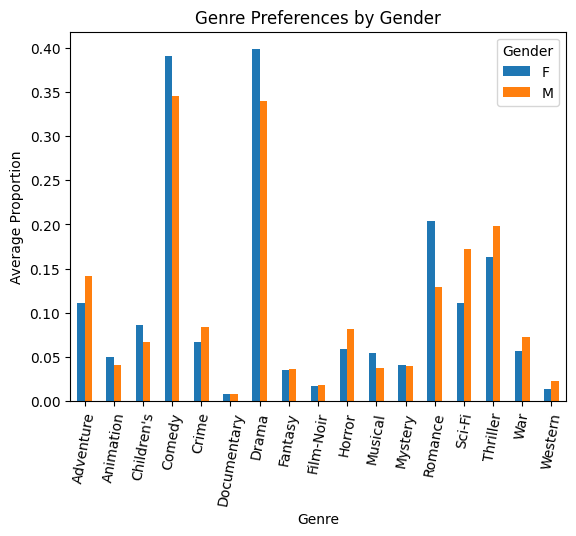

In [ ]:
## 6. 성별에 따른 장르 선호도

gender_genre_preferences = df_total.groupby('Gender')[genres].mean()
plt.figure(figsize=(30, 10))
gender_genre_preferences.columns = gender_genre_preferences.columns.str.replace('Genre_', '')  # 'Genre_' 제거
gender_genre_preferences.T.plot(kind='bar')
plt.title('Genre Preferences by Gender')
plt.xlabel('Genre')
plt.ylabel('Average Proportion')
plt.xticks(rotation=80)
plt.legend(title='Gender')
plt.show()

In [ ]:
# 7. 사용자별 가장 많이 본 장르

# 각 사용자(UserID) 별로 원핫인코딩된 장르 컬럼들의 합을 구하기
user_genre_sums = df_total.groupby('UserID')[['Genre_Action', 'Genre_Adventure', 'Genre_Animation', 'Genre_Children\'s',
                                             'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama',
                                             'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_Musical',
                                             'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller',
                                             'Genre_War', 'Genre_Western']].sum()

# 가장 많이 본 장르를 알려주는 컬럼 추가
user_genre_sums['Most_Watched_Genre'] = user_genre_sums.idxmax(axis=1).str.replace('Genre_', '')

user_genre_sums = user_genre_sums[['Most_Watched_Genre', 'Genre_Action', 'Genre_Adventure', 'Genre_Animation',
                'Genre_Children\'s', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary',
                'Genre_Drama', 'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror',
                'Genre_Musical', 'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi',
                'Genre_Thriller', 'Genre_War', 'Genre_Western']]

user_genre_sums

,Most_Watched_Genre,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
UserID,,,,,,,,,,,,,,,,,,,
1,Drama,5,5,18,20,14,2,0,21,3,0,0,14,0,6,3,3,2,0
2,Drama,56,19,0,0,25,12,0,79,1,1,2,0,3,24,17,31,15,3
3,Comedy,23,25,3,3,30,0,0,8,2,0,3,1,1,5,6,5,2,6
4,Action,19,6,0,1,0,1,0,6,2,0,3,0,0,2,9,4,3,2
5,Drama,31,9,4,6,56,21,6,104,0,3,10,3,8,30,15,39,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,Drama,154,83,34,54,261,53,11,372,19,17,74,31,34,122,169,147,42,14
6037,Drama,28,9,1,6,59,18,1,98,4,9,9,4,13,22,39,68,16,4
6038,Comedy,2,1,3,1,12,0,0,9,0,0,2,0,0,6,1,0,4,0


## 230818

In [ ]:
df_total

,UserID,MovieID,Rating,TimeStamp,Title,Release,Gender,Age,Occupation,Zip-code,...,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Age Group
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),1975,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,< 18
1,1,661,3,978302109,James and the Giant Peach (1996),1996,F,1,10,48067,...,0,0,1,0,0,0,0,0,0,< 18
2,1,914,3,978301968,My Fair Lady (1964),1964,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,< 18
3,1,3408,4,978300275,Erin Brockovich (2000),2000,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,< 18
4,1,2355,5,978824291,"Bug's Life, A (1998)",1998,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,< 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),1989,M,25,6,11106,...,0,0,0,0,0,0,0,0,0,18-24
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",1992,M,25,6,11106,...,0,0,0,0,1,0,0,1,0,18-24
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),1995,M,25,6,11106,...,0,0,0,0,0,0,0,0,0,18-24
1000207,6040,1096,4,956715648,Sophie's Choice (1982),1982,M,25,6,11106,...,0,0,0,0,0,0,0,0,0,18-24


In [ ]:
print(df_total['Genre_Action'].value_counts())

0    742752
1    257457
Name: Genre_Action, dtype: int64


In [ ]:
#Action이 1일 때, Adventure도 1인 경우

count_both_1 = df_total[(df_total['Genre_Action'] == 1) & (df_total['Genre_Adventure'] == 1)].shape[0]
print("Number of rows where both Genre_Action and Genre_Adventure are 1:", count_both_1)

Number of rows where both Genre_Action and Genre_Adventure are 1: 90323


In [ ]:
df_total.columns

Index(['UserID', 'MovieID', 'Rating', 'TimeStamp', 'Title', 'Release',
       'Gender', 'Age', 'Occupation', 'Zip-code', 'Genre_Action',
       'Genre_Adventure', 'Genre_Animation', 'Genre_Children's',
       'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama',
       'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_Musical',
       'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller',
       'Genre_War', 'Genre_Western', 'Age Group'],
      dtype='object')

In [ ]:
# 장르 관련 컬럼들 선택
genre_columns = ['Genre_Action', 'Genre_Adventure', 'Genre_Animation', "Genre_Children's",
                 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama',
                 'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_Musical',
                 'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller',
                 'Genre_War', 'Genre_Western']

#같은 행에 1이 같이 있는 빈도 계산
genre_cooccurrence = df_total[genre_columns].T.dot(df_total[genre_columns])
genre_cooccurrence

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
Genre_Action,257457,90323,1329,2590,35633,30947,0,48916,10534,0,14699,1929,5698,27455,91290,83582,32649,6708
Genre_Adventure,90323,133953,6126,18331,27367,6420,0,15776,19326,1799,5050,4045,2471,16811,56308,20272,10610,2190
Genre_Animation,1329,6126,43293,33473,17242,0,0,305,2029,1799,618,15410,41,2449,2694,1371,595,0
Genre_Children's,2590,18331,33473,72186,33013,0,0,8785,15364,0,213,19137,217,2887,7692,231,595,341
Genre_Comedy,35633,27367,17242,33013,356580,18243,1093,69138,12403,5,15391,17728,4414,71762,23449,11375,9048,7914
Genre_Crime,30947,6420,0,0,18243,79541,0,37317,1179,6388,2632,0,7451,4696,4260,27294,0,0
Genre_Documentary,0,0,0,0,1093,0,7910,168,0,0,0,202,0,0,0,0,182,0
Genre_Drama,48916,15776,305,8785,69138,37317,168,354529,4194,2162,2989,5675,11640,56286,18698,38402,40798,4203
Genre_Fantasy,10534,19326,2029,15364,12403,1179,0,4194,36301,0,0,756,0,4371,14006,477,364,0
Genre_Film-Noir,0,1799,1799,0,5,6388,0,2162,0,18261,2,0,6396,445,2674,9512,0,0


In [ ]:
# 각 행 별 가장 큰 값 순서대로 뽑아서 DataFrame으로 보여주기
top_genres = genre_cooccurrence.apply(lambda row: row.nlargest(6).index.tolist(), axis=1)
top_genres_df = pd.DataFrame(top_genres.tolist(), columns=['0', '1', '2', '3', '4', '5'])
top_genres_df.insert(0, 'Genre', genre_cooccurrence.index)

# 'Genre_' 접두어 제거
top_genres_df['0'] = top_genres_df['0'].str.replace('Genre_', '')
top_genres_df['1'] = top_genres_df['1'].str.replace('Genre_', '')
top_genres_df['2'] = top_genres_df['2'].str.replace('Genre_', '')
top_genres_df['3'] = top_genres_df['3'].str.replace('Genre_', '')
top_genres_df['4'] = top_genres_df['4'].str.replace('Genre_', '')
top_genres_df['5'] = top_genres_df['5'].str.replace('Genre_', '')

top_genres_df


,Genre,0,1,2,3,4,5
0,Genre_Action,Action,Sci-Fi,Adventure,Thriller,Drama,Comedy
1,Genre_Adventure,Adventure,Action,Sci-Fi,Comedy,Thriller,Fantasy
2,Genre_Animation,Animation,Children's,Comedy,Musical,Adventure,Sci-Fi
3,Genre_Children's,Children's,Animation,Comedy,Musical,Adventure,Fantasy
4,Genre_Comedy,Comedy,Romance,Drama,Action,Children's,Adventure
5,Genre_Crime,Crime,Drama,Action,Thriller,Comedy,Mystery
6,Genre_Documentary,Documentary,Comedy,Musical,War,Drama,Action
7,Genre_Drama,Drama,Comedy,Romance,Action,War,Thriller
8,Genre_Fantasy,Fantasy,Adventure,Children's,Sci-Fi,Comedy,Action
9,Genre_Film-Noir,Film-Noir,Thriller,Mystery,Crime,Sci-Fi,Drama


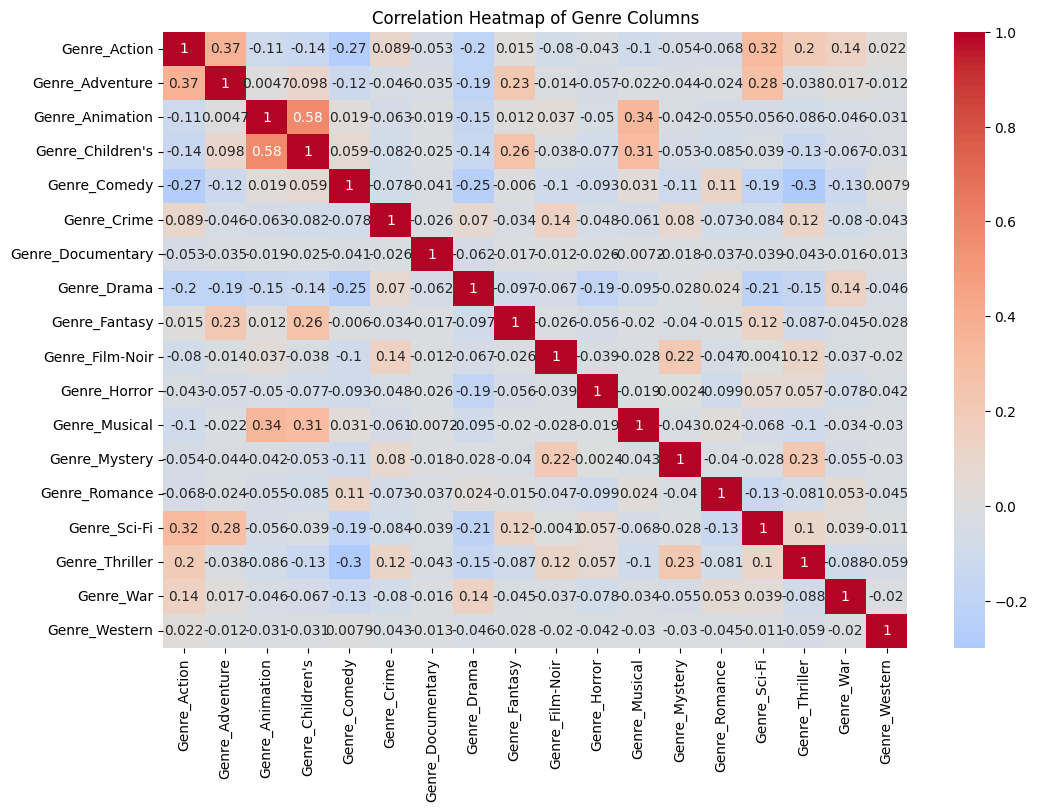

In [ ]:
#corr

# 분석할 컬럼들 선택
Genre_selected_columns = ['Genre_Action', 'Genre_Adventure', 'Genre_Animation', "Genre_Children's",
                    'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama',
                    'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_Musical',
                    'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller',
                    'Genre_War', 'Genre_Western']

# 선택한 컬럼들의 상관관계 계산
correlation_matrix = df_total[Genre_selected_columns].corr()

# 상관관계를 히트맵으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Genre Columns')
plt.show()


In [ ]:
#Genre_Action과 상관관계 높은 순서대로 출력

# 선택한 컬럼들의 상관관계 계산
correlation_matrix = df_total[Genre_selected_columns].corr()

# 각 장르 컬럼과의 상관관계를 내림차순으로 정렬하여 확인
correlation_with_genre = correlation_matrix['Genre_Action'].sort_values(ascending=False)

# 상관관계가 높은 순서대로 출력
print("Correlation with Genre_Action:")
print(correlation_with_genre)

Correlation with Genre_Action:
Genre_Action         1.000000
Genre_Adventure      0.374961
Genre_Sci-Fi         0.319117
Genre_Thriller       0.202756
Genre_War            0.135872
Genre_Crime          0.088519
Genre_Western        0.022242
Genre_Fantasy        0.014551
Genre_Horror        -0.042733
Genre_Documentary   -0.052565
Genre_Mystery       -0.054084
Genre_Romance       -0.067830
Genre_Film-Noir     -0.080288
Genre_Musical       -0.100432
Genre_Animation     -0.110294
Genre_Children's    -0.141314
Genre_Drama         -0.202415
Genre_Comedy        -0.268092
Name: Genre_Action, dtype: float64


In [ ]:
# 선택한 컬럼들의 상관관계 계산
correlation_matrix = df_total[Genre_selected_columns].corr()

# 각 컬럼별로 상관관계가 높은 상위 5개 컬럼 뽑아주는 함수 정의
def get_top_correlated_columns(correlation_matrix, column, n=5):
    correlations = correlation_matrix[column].sort_values(ascending=False)
    top_correlated = correlations[1:n+1]  # 제일 높은 것을 제외하고 상위 n개 선택
    return top_correlated.index

# 각 컬럼별로 상관관계가 높은 상위 5개 컬럼을 DataFrame으로 저장
top_correlated_df = pd.DataFrame()
for column in Genre_selected_columns:
    top_correlated = get_top_correlated_columns(correlation_matrix, column)
    top_correlated_without_genre = [col.replace('Genre_', '') for col in top_correlated]
    top_correlated_df[column] = top_correlated_without_genre

# 결과 출력
top_correlated_df

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,Adventure,Action,Children's,Animation,Romance,Film-Noir,Musical,War,Children's,Mystery,Thriller,Animation,Thriller,Comedy,Action,Mystery,Drama,Action
1,Sci-Fi,Sci-Fi,Musical,Musical,Children's,Thriller,Film-Noir,Crime,Adventure,Crime,Sci-Fi,Children's,Film-Noir,War,Adventure,Action,Action,Comedy
2,Thriller,Fantasy,Film-Noir,Fantasy,Musical,Action,Western,Romance,Sci-Fi,Thriller,Mystery,Comedy,Crime,Drama,Fantasy,Film-Noir,Romance,Sci-Fi
3,War,Children's,Comedy,Adventure,Animation,Mystery,War,Mystery,Action,Animation,Musical,Romance,Horror,Musical,Thriller,Crime,Sci-Fi,Adventure
4,Crime,War,Fantasy,Comedy,Western,Drama,Fantasy,Western,Animation,Sci-Fi,Documentary,Documentary,Documentary,Fantasy,Horror,Sci-Fi,Adventure,Documentary


In [ ]:
top_genres_df.reset_index(drop=True, inplace=True)
top_genres_df.set_index('Genre', inplace=True)
top_genres_df

t_T = top_genres_df.T

In [ ]:
## 원핫인코딩 결과 바탕으로 단순 빈도 계산

t_T = t_T.iloc[1:]
t_T

Genre,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
1,Sci-Fi,Action,Children's,Animation,Romance,Drama,Comedy,Comedy,Adventure,Thriller,Thriller,Children's,Thriller,Comedy,Action,Action,Drama,Comedy
2,Adventure,Sci-Fi,Comedy,Comedy,Drama,Action,Musical,Romance,Children's,Mystery,Sci-Fi,Comedy,Drama,Drama,Adventure,Sci-Fi,Action,Action
3,Thriller,Comedy,Musical,Musical,Action,Thriller,War,Action,Sci-Fi,Crime,Comedy,Animation,Crime,Action,Thriller,Drama,Romance,Drama
4,Drama,Thriller,Adventure,Adventure,Children's,Comedy,Drama,War,Comedy,Sci-Fi,Action,Romance,Film-Noir,Adventure,Comedy,Crime,Sci-Fi,Sci-Fi
5,Comedy,Fantasy,Sci-Fi,Fantasy,Adventure,Mystery,Action,Thriller,Action,Drama,Adventure,Drama,Action,Thriller,Drama,Mystery,Adventure,Adventure


In [ ]:
# corr 결과 바탕으로 상관관계 높은 순으로 결과 출력
top_correlated_df

#Crime, Drama
#대부분 1위 or 2위는 겹친다.


#가중치 비교??

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,Adventure,Action,Children's,Animation,Romance,Film-Noir,Musical,War,Children's,Mystery,Thriller,Animation,Thriller,Comedy,Action,Mystery,Drama,Action
1,Sci-Fi,Sci-Fi,Musical,Musical,Children's,Thriller,Film-Noir,Crime,Adventure,Crime,Sci-Fi,Children's,Film-Noir,War,Adventure,Action,Action,Comedy
2,Thriller,Fantasy,Film-Noir,Fantasy,Musical,Action,Western,Romance,Sci-Fi,Thriller,Mystery,Comedy,Crime,Drama,Fantasy,Film-Noir,Romance,Sci-Fi
3,War,Children's,Comedy,Adventure,Animation,Mystery,War,Mystery,Action,Animation,Musical,Romance,Horror,Musical,Thriller,Crime,Sci-Fi,Adventure
4,Crime,War,Fantasy,Comedy,Western,Drama,Fantasy,Western,Animation,Sci-Fi,Documentary,Documentary,Documentary,Fantasy,Horror,Sci-Fi,Adventure,Documentary


###2. 영화 release (개봉연도) 기준, 많이 시청한 나이

In [ ]:
df_release = df_total
df_release

,UserID,MovieID,Rating,TimeStamp,Title,Release,Gender,Age,Occupation,Zip-code,...,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Age Group
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),1975,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,< 18
1,1,661,3,978302109,James and the Giant Peach (1996),1996,F,1,10,48067,...,0,0,1,0,0,0,0,0,0,< 18
2,1,914,3,978301968,My Fair Lady (1964),1964,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,< 18
3,1,3408,4,978300275,Erin Brockovich (2000),2000,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,< 18
4,1,2355,5,978824291,"Bug's Life, A (1998)",1998,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,< 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),1989,M,25,6,11106,...,0,0,0,0,0,0,0,0,0,18-24
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",1992,M,25,6,11106,...,0,0,0,0,1,0,0,1,0,18-24
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),1995,M,25,6,11106,...,0,0,0,0,0,0,0,0,0,18-24
1000207,6040,1096,4,956715648,Sophie's Choice (1982),1982,M,25,6,11106,...,0,0,0,0,0,0,0,0,0,18-24


In [ ]:
# Release를 1950년부터 5년 단위로 묶기
df_release['Release'] = df_release['Release'].astype(int)
#df_release.info()

<ipython-input-47-9a460ca85e4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release['Release'] = df_release['Release'].astype(int)


In [ ]:
df_release['Release_Decade'] = (df_release['Release'] // 5) * 5

# 각 Age 데이터 빈도 측정
age_counts = df_release.groupby(['Release_Decade', 'Age'])['Age'].count().unstack()

# NaN값 0으로 변경
age_counts = age_counts.fillna(0)

# 값 int형으로 변경
age_counts = age_counts.astype(int)

age_counts

<ipython-input-48-ec6e3b35a71e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release['Release_Decade'] = (df_release['Release'] // 5) * 5


Age,1,18,25,35,45,50,56
Release_Decade,,,,,,,
1915,0,3,8,8,10,10,6
1920,6,60,119,88,38,26,4
1925,34,154,429,322,182,156,78
1930,111,490,1303,1145,663,638,326
1935,212,1054,2410,1931,991,897,558
1940,383,1699,4172,3454,1829,1647,1102
1945,163,687,1999,1752,930,969,715
1950,410,1832,4589,3773,2006,1886,1389
1955,422,2124,5533,4469,2471,2533,1795


In [ ]:
# Release_Decade별로 높은 컬럼 내림차순 정렬
age_counts_sorted = age_counts.apply(lambda row: row.sort_values(ascending=False).index.tolist(), axis=1)
age_counts_sorted

# 정렬된 값을 새로운 DataFrame에 저장
age_counts_sorted_df = pd.DataFrame(age_counts_sorted.tolist(), columns=[f'Top_{i+1}' for i in range(7)])  # 7개의 컬럼으로 변경
age_counts_sorted_df['Release_Decade'] = age_counts.index
age_counts_sorted_df = age_counts_sorted_df[['Release_Decade'] + [col for col in age_counts_sorted_df.columns if col != 'Release_Decade']]

age_counts_sorted_df

,Release_Decade,Top_1,Top_2,Top_3,Top_4,Top_5,Top_6,Top_7
0,1915,45,50,25,35,56,18,1
1,1920,25,35,18,45,50,1,56
2,1925,25,35,45,50,18,56,1
3,1930,25,35,45,50,18,56,1
4,1935,25,35,18,45,50,56,1
5,1940,25,35,45,18,50,56,1
6,1945,25,35,50,45,56,18,1
7,1950,25,35,45,50,18,56,1
8,1955,25,35,50,45,18,56,1
9,1960,25,35,50,18,45,56,1


In [ ]:
df_release['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

##230822

In [ ]:
df_total.head()

,UserID,MovieID,Rating,TimeStamp,Title,Release,Gender,Age,Occupation,Zip-code,...,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Age Group,Release_Decade
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),1975,F,1,10,48067,...,0,0,0,0,0,0,0,0,< 18,1975
1,1,661,3,978302109,James and the Giant Peach (1996),1996,F,1,10,48067,...,0,1,0,0,0,0,0,0,< 18,1995
2,1,914,3,978301968,My Fair Lady (1964),1964,F,1,10,48067,...,0,1,0,1,0,0,0,0,< 18,1960
3,1,3408,4,978300275,Erin Brockovich (2000),2000,F,1,10,48067,...,0,0,0,0,0,0,0,0,< 18,2000
4,1,2355,5,978824291,"Bug's Life, A (1998)",1998,F,1,10,48067,...,0,0,0,0,0,0,0,0,< 18,1995


In [ ]:
df_release

,UserID,MovieID,Rating,TimeStamp,Title,Release,Gender,Age,Occupation,Zip-code,...,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Age Group,Release_Decade
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),1975,F,1,10,48067,...,0,0,0,0,0,0,0,0,< 18,1975
1,1,661,3,978302109,James and the Giant Peach (1996),1996,F,1,10,48067,...,0,1,0,0,0,0,0,0,< 18,1995
2,1,914,3,978301968,My Fair Lady (1964),1964,F,1,10,48067,...,0,1,0,1,0,0,0,0,< 18,1960
3,1,3408,4,978300275,Erin Brockovich (2000),2000,F,1,10,48067,...,0,0,0,0,0,0,0,0,< 18,2000
4,1,2355,5,978824291,"Bug's Life, A (1998)",1998,F,1,10,48067,...,0,0,0,0,0,0,0,0,< 18,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),1989,M,25,6,11106,...,0,0,0,0,0,0,0,0,18-24,1985
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",1992,M,25,6,11106,...,0,0,0,1,0,0,1,0,18-24,1990
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),1995,M,25,6,11106,...,0,0,0,0,0,0,0,0,18-24,1995
1000207,6040,1096,4,956715648,Sophie's Choice (1982),1982,M,25,6,11106,...,0,0,0,0,0,0,0,0,18-24,1980


In [ ]:
age_counts

Age,1,18,25,35,45,50,56
Release_Decade,,,,,,,
1915,0,3,8,8,10,10,6
1920,6,60,119,88,38,26,4
1925,34,154,429,322,182,156,78
1930,111,490,1303,1145,663,638,326
1935,212,1054,2410,1931,991,897,558
1940,383,1699,4172,3454,1829,1647,1102
1945,163,687,1999,1752,930,969,715
1950,410,1832,4589,3773,2006,1886,1389
1955,422,2124,5533,4469,2471,2533,1795


In [ ]:
# ANOVA 검정
# 분산분석, ANOVA는 세 개 이상의 그룹 간의 평균 차이를 평가하기 위한 검정 방법

from scipy.stats import f_oneway

# 각 나이 그룹에 해당하는 데이터 리스트 추출
age_1 = age_counts.loc[:, 1].dropna().values
age_18 = age_counts.loc[:, 18].dropna().values
age_25 = age_counts.loc[:, 25].dropna().values
age_35 = age_counts.loc[:, 35].dropna().values
age_45 = age_counts.loc[:, 45].dropna().values
age_50 = age_counts.loc[:, 50].dropna().values
age_56 = age_counts.loc[:, 56].dropna().values

# 분산분석 실행
f_statistic, p_val = f_oneway(age_1, age_18, age_25, age_35, age_45, age_50, age_56)

print("F-statistic:", f_statistic)
print("P-value:", p_val)

if p_val < 0.05:
    print("유의미한 연관성이 존재합니다. 통계적으로 유의미한 연관성이 있습니다.")
else:
    print("유의미한 연관성이 존재하지 않습니다. 통계적으로 유의미하지 않습니다.")

F-statistic: 3.232949491890171
P-value: 0.005599607551846296
유의미한 연관성이 존재합니다. 통계적으로 유의미한 연관성이 있습니다.


In [ ]:
# 카이제곱 검정
# Chi-Square Test, 범주형 변수 간의 관련성을 평가하기 위한 검정 방법

from scipy.stats import chi2_contingency

# 'age_counts' DataFrame의 각 나이 그룹에 해당하는 데이터 추출
age_group_data = [
    age_counts.loc[:, 1].values,
    age_counts.loc[:, 18].values,
    age_counts.loc[:, 25].values,
    age_counts.loc[:, 35].values,
    age_counts.loc[:, 45].values,
    age_counts.loc[:, 50].values,
    age_counts.loc[:, 56].values
]

# 카이제곱 검정 실행
chi2_stat, p_val, dof, expected = chi2_contingency(age_group_data)

print("Chi-squared:", chi2_stat)
print("P-value:", p_val)
# print("Degrees of freedom:", dof)
# print("Expected frequencies:\n", expected)

if p_val < 0.05:
    print("유의미한 연관성이 존재합니다. 통계적으로 유의미한 연관성이 있습니다.")
else:
    print("유의미한 연관성이 존재하지 않습니다. 통계적으로 유의미하지 않습니다.")

Chi-squared: 40566.83125472182
P-value: 0.0
유의미한 연관성이 존재합니다. 통계적으로 유의미한 연관성이 있습니다.


<Figure size 1200x800 with 0 Axes>

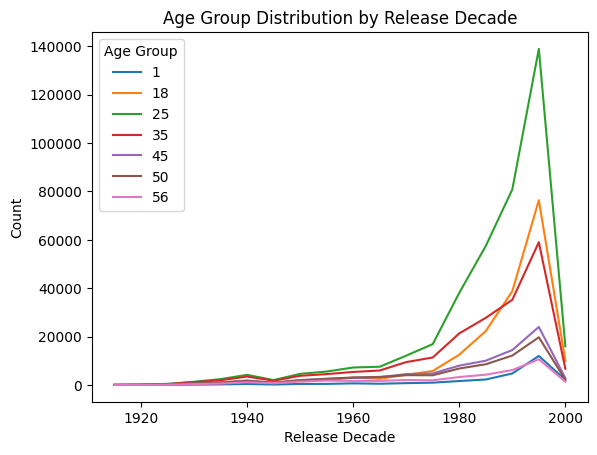

In [ ]:
#선형 그래프

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(12, 8))

# 선 그래프 그리기
age_counts.plot(kind='line')

# 그래프 제목과 축 레이블 설정
plt.title('Age Group Distribution by Release Decade')
plt.xlabel('Release Decade')
plt.ylabel('Count')

# 범례 추가
plt.legend(title='Age Group')

# 그래프 출력
plt.show()